In [53]:
import pandas as pd
import numpy as np
import os
import shutil

In [149]:
# Attempt to get text from file
# f=open("data/easy_ham/00002.9c4069e25e1ef370c078db7ee85ff9ac", "r")
# f=open("data/easy_ham/00003.860e3c3cee1b42ead714c5c874fe25f7", "r")
f=open("data/easy_ham/00005.bf27cdeaf0b8c4647ecd61b1d09da613", "r")
content = f.read()
# print(content)
print(content.find("\n\n"))
index = content.find("\n\n")
print(content[index:])

2332


>  in adding cream to spaghetti carbonara, which has the same effect on pasta as
>  making a pizza a deep-pie; 

I just had to jump in here as Carbonara is one of my favourites to make and ask 
what the hell are you supposed to use instead of cream?  I've never seen a 
recipe that hasn't used this.  Personally I use low fat creme fraiche because it 
works quite nicely but the only time I've seen an supposedly authentic recipe 
for carbonara  it was identical to mine (cream, eggs and lots of fresh parmesan) 
except for the creme fraiche.

Stew
-- 
Stewart Smith
Scottish Microelectronics Centre, University of Edinburgh.
http://www.ee.ed.ac.uk/~sxs/


------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! 

In [18]:
for dirname in os.listdir("data"):
    print(dirname)

20030228_hard_ham.tar.bz2
spam
hard_ham
spam_2
.DS_Store
easy_ham
20030228_easy_ham_2.tar.bz2
20030228_spam.tar.bz2
20030228_easy_ham.tar.bz2
20050311_spam_2.tar.bz2
easy_ham_2


In [24]:

dir_names = ["spam", "spam_2", "hard_ham", "easy_ham", "easy_ham_2"]

file_dict = {}
for directory in dir_names:
    print(directory)
    file_dict[directory] = list()
    for filename in os.listdir(f"data/{directory}"):
        file_dict[directory].append(filename)

spam
spam_2
hard_ham
easy_ham
easy_ham_2


In [32]:
# split into train / test
# fraction of data given to test. train given 1 - train_test_ratio
train_test_ratio = 0.8 

In [38]:
def make_test_train_list(file_list):
    list_length = len(file_list)
    div_index = int(train_test_ratio*list_length)
    train = file_list[:div_index]
    test = file_list[div_index:]
    return train, test

In [44]:
# test the test/train list function
a, b = make_test_train_list(file_dict["spam"])

In [91]:
# Make test and train directory. Make test/train list. Move files into test/train
os.makedirs("data/test", exist_ok=True)
os.makedirs("data/train", exist_ok=True)

In [104]:
dir_names = ["spam", "spam_2", "hard_ham", "easy_ham", "easy_ham_2"]

for directory in dir_names:
    print(directory)

    spam_prefix = ""
    if "spam" in directory:
        spam_prefix = "spam"
    if "ham" in directory:
        spam_prefix = "ham"
    
    file_list = os.listdir(f"data/{directory}")
    train_list, test_list = make_test_train_list(file_list)
    for filename in train_list:
        shutil.copy(f"data/{directory}/{filename}", f"data/train/{spam_prefix}_{filename}")
    for filename in test_list:
        shutil.copy(f"data/{directory}/{filename}", f"data/test/{spam_prefix}_{filename}")

spam
spam_2
hard_ham
easy_ham
easy_ham_2


# Make list of most common words

In [119]:
# Punctation remover
import string

translator = str.maketrans('', '', string.punctuation)

# This is an alternative that creates a dictionary mapping
# of every character from string.punctuation to None (this will
# also work)
#translator = str.maketrans(dict.fromkeys(string.punctuation))

s = 'string with "punctuation" inside of it! Does this work? I hope so.'

# pass the translator to the string's translate method.
print(s.translate(translator))

string with punctuation inside of it Does this work I hope so


In [211]:
def text_after_2_newlines(string):
    index = string.find("\n\n")
    string = string[index:]
    return string

In [212]:
words_all, words_spam, words_ham = list(), list(), list()

for filename in os.listdir("data/train/"):
    file = open(f"data/train/{filename}", "r", encoding = "ISO-8859-1")
    text = file.read()
#     index = text.find("\n\n")
#     text = text[index:]
    text = text_after_2_newlines(text)
    text = text.translate(translator)
    text = text.lower()

    text_list = text.split()
    
    words_all = words_all + text_list
    if "spam" in filename:
        words_spam = words_spam + text_list
    if "ham" in filename:
        words_ham = words_ham + text_list

In [213]:
# Get occurance count for each word
from collections import Counter 

occurance = Counter(words_all)
occurance_spam = Counter(words_spam)
occurance_ham = Counter(words_ham)

In [214]:
occurance.most_common(10)

[('the', 56279),
 ('to', 38801),
 ('a', 32489),
 ('and', 29233),
 ('of', 27650),
 ('in', 18297),
 ('you', 16283),
 ('is', 16190),
 ('for', 15863),
 ('td', 14809)]

In [215]:
occurance["bit"]

304

In [217]:
occurance_ham.most_common(10)

[('the', 40328),
 ('to', 24012),
 ('a', 22675),
 ('and', 18388),
 ('of', 17996),
 ('in', 12441),
 ('is', 11145),
 ('that', 9817),
 ('for', 9676),
 ('i', 8872)]

In [218]:
occurance_spam.most_common(10)

[('the', 15951),
 ('to', 14789),
 ('and', 10845),
 ('a', 9814),
 ('you', 9750),
 ('of', 9654),
 ('td', 8642),
 ('tr', 6736),
 ('your', 6444),
 ('for', 6187)]

In [219]:
occurance_diff = occurance_ham - occurance_spam

In [220]:
occurance_diff.most_common(20)

[('the', 24377),
 ('a', 12861),
 ('to', 9223),
 ('of', 8342),
 ('and', 7543),
 ('that', 6872),
 ('in', 6585),
 ('is', 6100),
 ('i', 5993),
 ('it', 5755),
 ('on', 4295),
 ('for', 3489),
 ('but', 3116),
 ('width1', 2776),
 ('with', 2677),
 ('as', 2491),
 ('at', 2282),
 ('its', 2120),
 ('was', 2080),
 ('from', 1999)]

# Make wordcloud

In [221]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [222]:
# import sys
# !conda install -c conda-forge --yes --prefix {sys.prefix} wordcloud

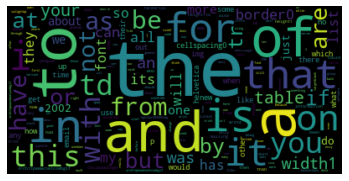

In [223]:
wordcloud = WordCloud().generate_from_frequencies(occurance_ham)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

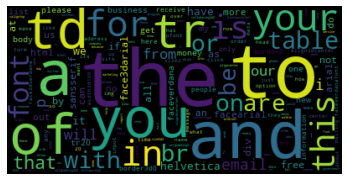

In [224]:
wordcloud = WordCloud().generate_from_frequencies(occurance_spam)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [182]:
from re import search

In [203]:
example = "https://.website.com"
example = "normal text"
test_list = list()
match_var = bool(search(pattern1, example) or search(pattern2, example))
print(match_var)
test_list.append(match_var)

False


# Make feature word list

In [225]:
feature_words = [
    "hello",
    "greatings",
    "sir", 
    "madam",
    "your",
    "gold",
    "dollar",
    "offer",
    "password",
    "font",
    "helvetica",
    "arial",
    "table",
    "of",
    "with",
]

# Grab training data and make basic feature extraction pipeline

In [226]:
def basic_pipeline(text, feature_words):
    text = text.lower()
    feat_list = list()
    for word in feature_words:
        feat_list.append(word in text)
    
    return feat_list

In [229]:
def check_contains_url(text):
    pattern1 = "https:"
    pattern2 = "www."
    return bool(search(pattern1, text) or search(pattern2, text))

In [230]:
def collect_features_from_text(dir_string):
    feature_mat = list()
    y = list() # positive if spam

    for filename in os.listdir(dir_string):
        file = open(f"{dir_string}{filename}", "r", encoding = "ISO-8859-1")
        text = file.read()
        text = text_after_2_newlines(text)

        y.append("spam" in filename)
        features = basic_pipeline(text, feature_words)
        features.append(check_contains_url(text))

        feature_mat.append(features)
        
    return y, feature_mat

In [231]:
y_train, x_train = collect_features_from_text("data/train/")

In [232]:
x_train

[[False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  False],
 [False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  False],
 [False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True],
 [False,
  False,
  False,
  False,
  True,
  False,
  False,
  False,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True],


In [235]:
y_train

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


# Try urllib to access the email files

In [236]:
import urllib